In [1]:
!pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
kaggle_data={"username":"sainaikbanavath","key":"5c06a4158a901c33371b6b2e9a4494b0"}
os.environ['KAGGLE_USERNAME']=kaggle_data["username"]
os.environ['KAGGLE_KEY']=kaggle_data["key"]
import kaggle

In [3]:
!kaggle competitions download -c spaceship-titanic
!unzip spaceship-titanic

100% 299k/299k [00:00<00:00, 869kB/s]
100% 299k/299k [00:00<00:00, 869kB/s]
Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
#Read the Dataset
import pandas as pd

In [417]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### EDA

In [6]:
print (f"shape of the train dataframe is {train_df.shape}")
print (f"shape of the test dataframe is {test_df.shape}")

shape of the train dataframe is (8693, 14)
shape of the test dataframe is (4277, 13)


In [7]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
for col in train_df:
    print(f'Number of Unique values in column "{col}":', train_df[col].nunique())
    print(f'Type of the column "{col}":', train_df[col].dtypes)
    print ()


Number of Unique values in column "PassengerId": 8693
Type of the column "PassengerId": object

Number of Unique values in column "HomePlanet": 3
Type of the column "HomePlanet": object

Number of Unique values in column "CryoSleep": 2
Type of the column "CryoSleep": object

Number of Unique values in column "Cabin": 6560
Type of the column "Cabin": object

Number of Unique values in column "Destination": 3
Type of the column "Destination": object

Number of Unique values in column "Age": 80
Type of the column "Age": float64

Number of Unique values in column "VIP": 2
Type of the column "VIP": object

Number of Unique values in column "RoomService": 1273
Type of the column "RoomService": float64

Number of Unique values in column "FoodCourt": 1507
Type of the column "FoodCourt": float64

Number of Unique values in column "ShoppingMall": 1115
Type of the column "ShoppingMall": float64

Number of Unique values in column "Spa": 1327
Type of the column "Spa": float64

Number of Unique valu

In [10]:
categorical_columns = ['HomePlanet','CryoSleep','Cabin','Destination','VIP']
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target_column = 'Transported'
unwanted_columns = ['Name','PassengerId']

In [11]:
train_df[numerical_columns].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
train_df[categorical_columns].describe()

,HomePlanet,CryoSleep,Cabin,Destination,VIP
count,8492,8476,8494,8511,8490
unique,3,2,6560,3,2
top,Earth,False,G/734/S,TRAPPIST-1e,False
freq,4602,5439,8,5915,8291


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function for numerical columns
import math

# Function for numerical columns
def plot_numerical(df, num_cols):
    num_plots = len(num_cols) * 2
    num_rows = len(num_cols)

    fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows*4))
    axs = axs.ravel()

    for i, col in enumerate(num_cols):
        # histogram with KDE
        sns.histplot(df[col], kde=True, bins=20, ax=axs[2*i])
        axs[2*i].set_title(f'Histogram with KDE for {col}')

        # boxplot
        sns.boxplot(x=target_column, y='Age', data=train_df,ax=axs[2*i+1])
        axs[2*i+1].set_title(f'Boxplot for {col} by taget col: {target_column}')

    plt.tight_layout()
    plt.show()


# Function for categorical columns
def plot_categorical(df, cat_cols):
    num_plots = len(cat_cols) * 2
    num_rows = len(cat_cols)

    fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows*4))
    axs = axs.ravel()

    for i, col in enumerate(cat_cols):

        # pie chart
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[2*i])
        axs[2*i].set_title(f'Pie char for {col}')


        # countplot
        sns.countplot(data=df, x=col, hue=target_column,ax=axs[2*i+1])
        axs[2*i+1].set_title(f'Countplot for {col}  by taget col: {target_column} ')


    plt.tight_layout()
    plt.show()


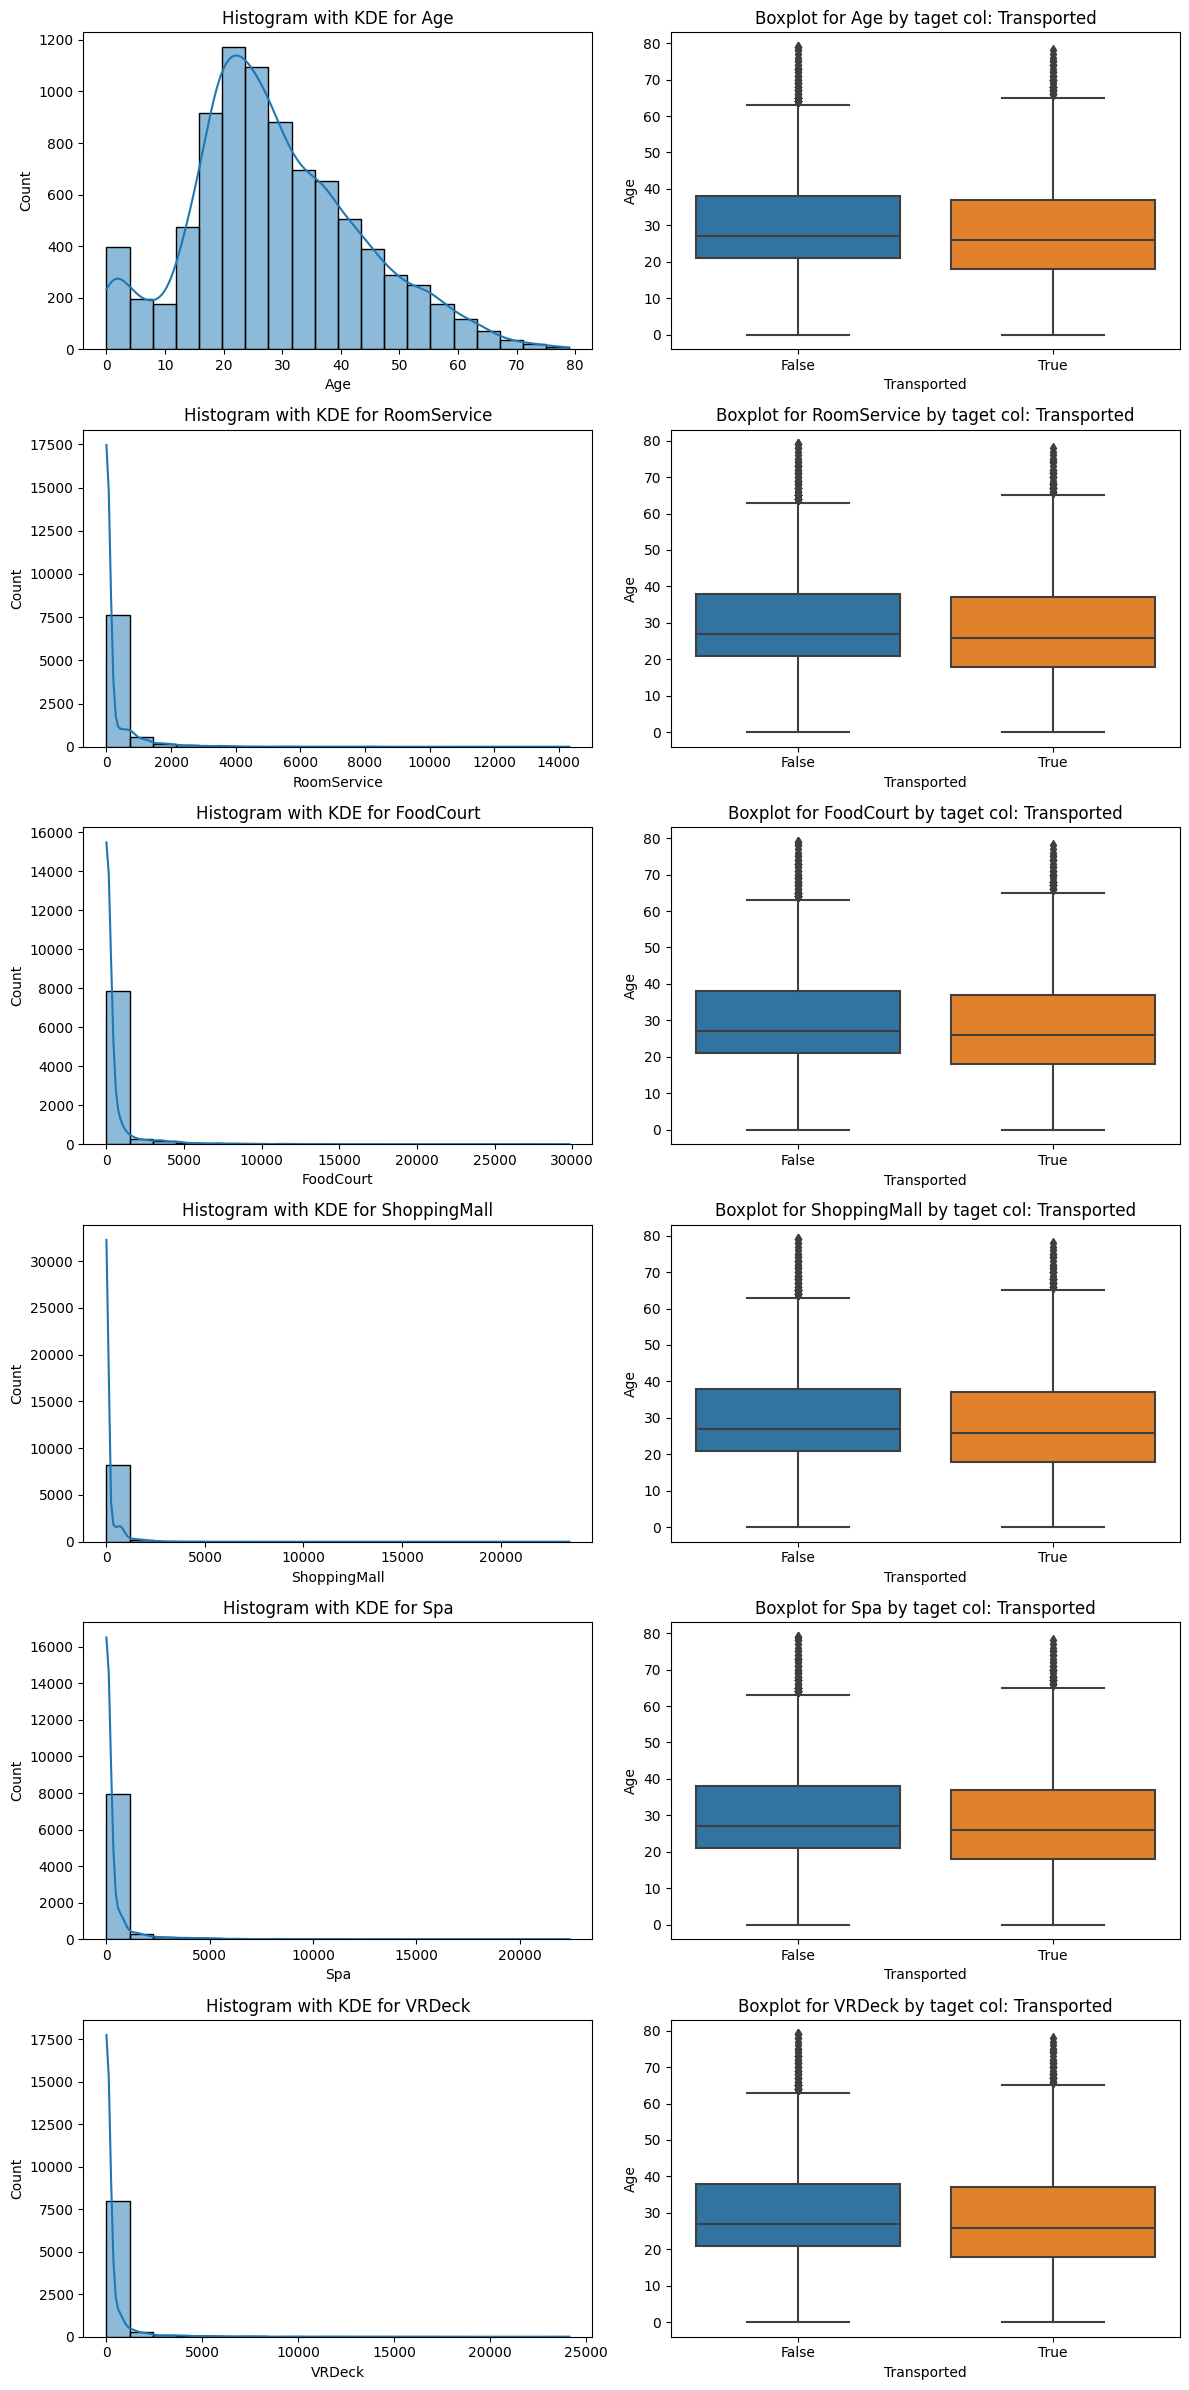

In [420]:
plot_numerical(train_df,['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])#

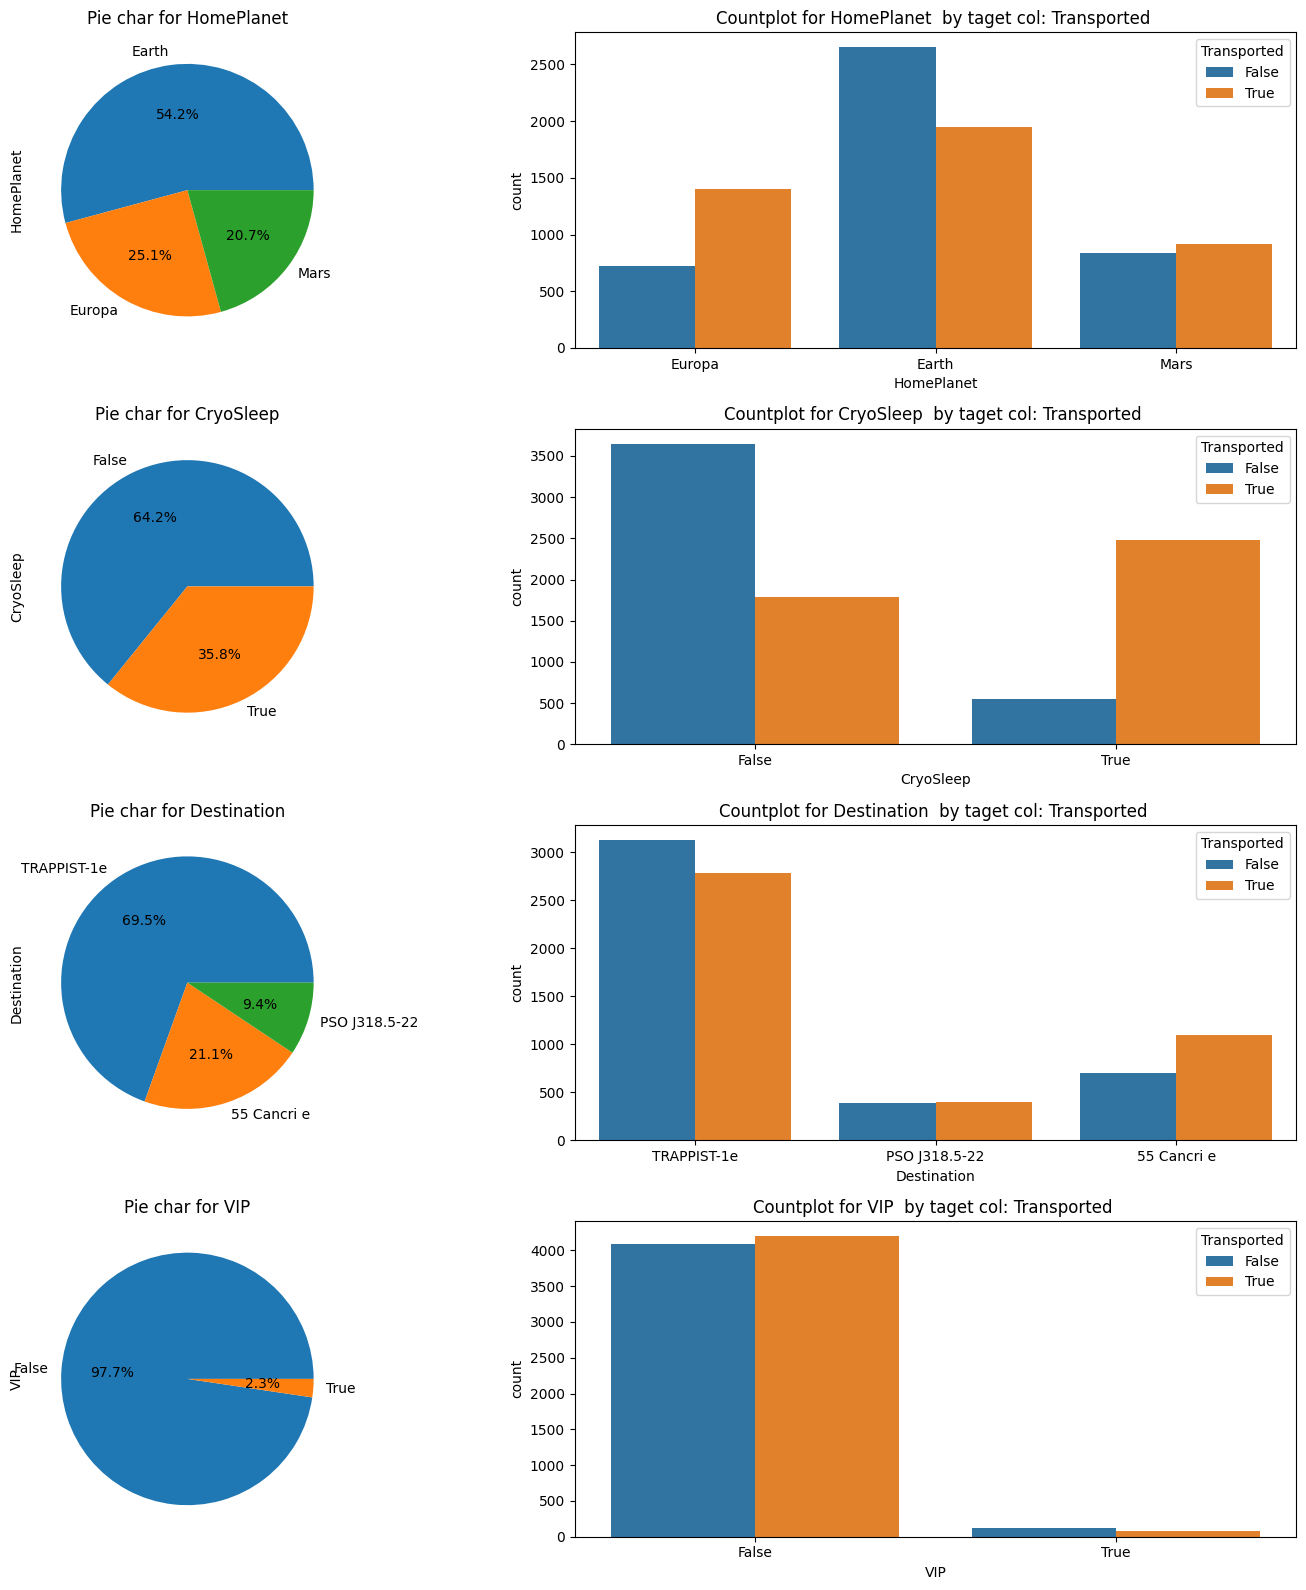

In [37]:
plot_categorical(train_df,['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])

In [51]:
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency
#Functions to Perform TTest, Man Whitney U Test, Chi Squared Test

def perform_ttest(df, numerical, categorical):
    group1 = df[df[categorical] == df[categorical].unique()[0]][numerical]
    group2 = df[df[categorical] == df[categorical].unique()[1]][numerical]

    _, p_val = ttest_ind(group1, group2, nan_policy='omit')

    return 'Significant' if p_val < 0.05 else 'Insignificant'

def perform_mannwhitneyu(df, numerical, categorical):
    group1 = df[df[categorical] == df[categorical].unique()[0]][numerical]
    group2 = df[df[categorical] == df[categorical].unique()[1]][numerical]

    _, p_val = mannwhitneyu(group1.dropna(), group2.dropna())

    return 'Significant' if p_val < 0.05 else 'Insignificant'

def perform_chi2(df, cat1, cat2):
    contingency_table = pd.crosstab(df[cat1], df[cat2])
    _, p_val, _, _ = chi2_contingency(contingency_table)

    return 'Significant' if p_val < 0.05 else 'Insignificant'

def perform_statistical_tests(df, test_dict):
    results = []

    for column_name, test_info in test_dict.items():
        test_function = test_info['test']
        args = test_info['args']

        # Call the test function
        result = test_function(df, *args)

        # Append results
        results.append({'column_name': column_name,
                        'test_performed': test_function.__name__,
                        'Result': result})

    # Convert results to DataFrame
    return pd.DataFrame(results)

# Example Usage
test_dict = {
    'HomePlanet': {'test': perform_chi2, 'args': ['HomePlanet', 'Transported']},
    'CryoSleep': {'test': perform_chi2, 'args': ['CryoSleep', 'Transported']},
    'VIP': {'test': perform_chi2, 'args': ['VIP', 'Transported']},
    'Destination': {'test': perform_chi2, 'args': ['Destination', 'Transported']},

    'Age': {'test': perform_ttest, 'args': ['Age','Transported']},
    'RoomService': {'test': perform_mannwhitneyu, 'args': ['RoomService','Transported']},
    'FoodCourt': {'test': perform_mannwhitneyu, 'args': ['FoodCourt','Transported']},
    'ShoppingMall': {'test': perform_mannwhitneyu, 'args': ['ShoppingMall','Transported']},
    'Spa': {'test': perform_mannwhitneyu, 'args': ['Spa','Transported']},
    'VRDeck': {'test': perform_mannwhitneyu, 'args': ['VRDeck','Transported']}
}
result_df = perform_statistical_tests(train_df, test_dict)
result_df

,column_name,test_performed,Result
0,HomePlanet,perform_chi2,Significant
1,CryoSleep,perform_chi2,Significant
2,VIP,perform_chi2,Significant
3,Destination,perform_chi2,Significant
4,Age,perform_ttest,Significant
5,RoomService,perform_mannwhitneyu,Significant
6,FoodCourt,perform_mannwhitneyu,Significant
7,ShoppingMall,perform_mannwhitneyu,Significant
8,Spa,perform_mannwhitneyu,Significant
9,VRDeck,perform_mannwhitneyu,Significant


<Axes: >

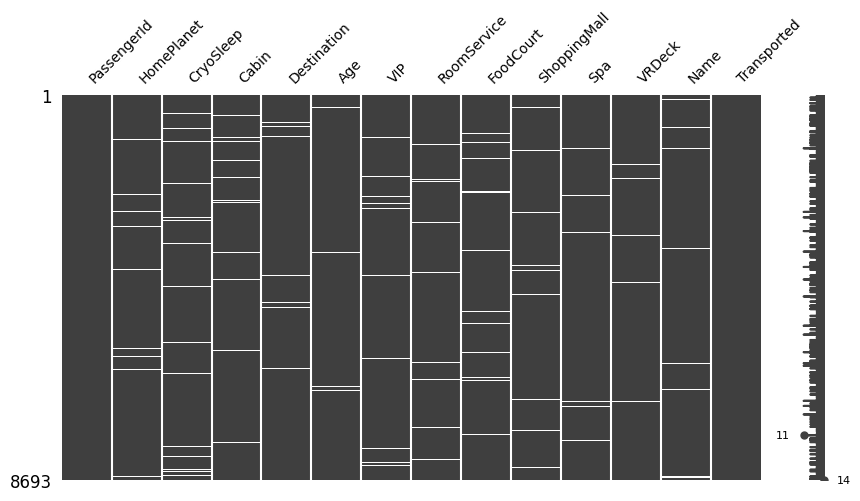

In [55]:
import missingno as msno
msno.matrix(train_df,figsize=(10,5),fontsize=10)

### Pre Processing

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [297]:
#Function to Pre-process Dataset
def pre_process_dataset(df,
                        mode='Train',
                        mean_imputer = None,
                        mode_imputer = None,
                        oh_encoder = None):

  df['Cabin_deck'] = df['Cabin'].str.split("/").str[0]
  df['Cabin_num'] = df['Cabin'].str.split("/").str[1].astype('float64')
  df['Cabin_starboard'] = df['Cabin'].str.split("/").str[2]

  df['Passenger_group'] = df['PassengerId'].str.split("_").str[0]

  cat_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck','Cabin_starboard']
  money_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

  if mode== 'Train':
    mean_imputer = SimpleImputer(strategy='mean')
    mode_imputer = SimpleImputer(strategy='most_frequent')
    oh_encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
    label_encoder = LabelEncoder()



    df[['Age']] = mean_imputer.fit_transform(df[['Age']])
    df[cat_columns] = mode_imputer\
                .fit_transform(df[cat_columns] )


    one_hot = oh_encoder.fit_transform(df[cat_columns])
    one_hot = pd.DataFrame(one_hot,columns = oh_encoder.get_feature_names_out(),index=df.index)
    df = pd.concat([df,one_hot],axis=1)
    df['Transported'] = label_encoder.fit_transform(df['Transported'])

  else:
    df[['Age']] = mean_imputer.transform(df[['Age']])
    df[cat_columns] = mode_imputer\
                .transform(df[cat_columns] )


    one_hot = oh_encoder.transform(df[cat_columns])
    one_hot = pd.DataFrame(one_hot,columns = oh_encoder.get_feature_names_out(),index=df.index)
    df = pd.concat([df,one_hot],axis=1)

  df[money_columns] = df[money_columns].fillna(0)
  df['Cabin_num'] = df['Cabin_num'].fillna(-1)

  if mode == 'Train':
    df = df.drop(columns=['Name','Cabin','PassengerId'])
    return df,mean_imputer, mode_imputer, oh_encoder,label_encoder
  else:
    df = df.drop(columns=['Name','Cabin'])
    return df

In [252]:
pre_process_df,mean_imputer, mode_imputer, oh_encoder,label_encoder = pre_process_dataset(train_df.copy(),'Train')

In [298]:
pre_process_df_test = pre_process_dataset(test_df.copy(),'Test',mean_imputer, mode_imputer, oh_encoder)

### Feature Engineering

In [247]:
#Function for Feature Engineering
def feat_eng(df):

    def mul_two_categorical_columns(df1,df2):
      result = pd.DataFrame(index=df1.index)
      for col1 in df1.columns:
          for col2 in df2.columns:
              result[col1 + "_" + col2] = df1[col1] * df2[col2]
      return result

    money_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df['total_spend'] = df[money_columns].sum(axis=1)
    df['avg_spend'] = df[money_columns].mean(axis=1)
    df['max_spend'] = df[money_columns].max(axis=1)
    df['min_spend'] = df[money_columns].max(axis=1)

    for col in money_columns:
      df[f"{col}_spent_perc"] = df[col]/df['total_spend']

    group_counts = df.groupby('Passenger_group')['Passenger_group'].transform('count')
    df['is_group'] = group_counts > 1

    home_cyro = mul_two_categorical_columns(df.filter(like='HomePlanet_'),df.filter(like='CryoSleep_'))
    home_destination = mul_two_categorical_columns(df.filter(like='HomePlanet_'),df.filter(like='Destination_'))
    destination_cyro = mul_two_categorical_columns(df.filter(like='Destination_'),df.filter(like='CryoSleep_'))

    df = pd.concat([df,home_cyro,home_destination,destination_cyro],axis=1)
    df = df.fillna(0)
    return df


In [254]:
feat_df = feat_eng(pre_process_df.copy())

In [299]:
feat_df_test = feat_eng(pre_process_df_test.copy())

### Model Building & Evaluation

In [388]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

unwanted_columns = ['HomePlanet', 'CryoSleep', 'Destination','VIP','Cabin_deck','Cabin_starboard','Passenger_group']

# Function to Scale the data and Prepare Trainning and Test data
def get_data_for_trainning(df,test_size=0.2):
  scaler = StandardScaler()
  X = df.drop(columns=['Transported'])
  y = df['Transported']
  df_scaled = scaler.fit_transform(X)
  df_scaled = pd.DataFrame(df_scaled,columns=X.columns,index=X.index)
  X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=test_size, random_state=42)
  return X_train, X_test, y_train, y_test,scaler

#Function to Test the Models
def train_models(X_train,X_test,y_train,y_test):
  models = {
      'Logistic Regression': LogisticRegression(),
      'Naive Bayes': GaussianNB(),
      'Support Vector Machine': SVC(),
      'K-Nearest Neighbors': KNeighborsClassifier(),
      'Decision Tree': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(random_state=42),
      'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
  }


  metrics_df = pd.DataFrame(columns=['Model', 'Accuracy'])
  trained_models = {}
  classification_reports = {}


  for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      report = classification_report(y_test, y_pred)
      classification_reports[name] = report
      trained_models[name] = model
      new_row = pd.DataFrame({'Model': [name], 'Accuracy': [accuracy]})
      metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

      # print(f'Model: {name}')
      # print(f'Accuracy: {accuracy}\n')

  return trained_models,metrics_df, classification_reports

#Function to Plot the Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Plot confusion matrix as heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_roc_curve(model, X_test, y_test):
    # Plot ROC curve
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def print_classification_report(y_test, y_pred):
    print("Classification Report:\n", classification_report(y_test, y_pred))

def generate_predictions(model,df,scaler,label_encoder):
  x = df.drop(columns=['PassengerId'])
  x_scaled = scaler.transform(x)
  x = pd.DataFrame(x_scaled,columns=x.columns,index=x.index)
  preds = model.predict(x)
  df['Transported'] = label_encoder.inverse_transform(preds)
  return df

#### Trainning on Data without Feature engineering

In [389]:
df = pre_process_df.drop(columns=unwanted_columns)
X_train, X_test, y_train, y_test,scaler_without_fe = get_data_for_trainning(df)
trained_models_without_fe,metrics_df,classification_reports = train_models(X_train, X_test, y_train, y_test)
metrics_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
5,Random Forest,0.797585
6,XGBoost,0.795285
2,Support Vector Machine,0.791259
0,Logistic Regression,0.782059
3,K-Nearest Neighbors,0.778033
4,Decision Tree,0.756182
1,Naive Bayes,0.746406


In [390]:
rf = trained_models_without_fe['Random Forest'] ##Selected the Best Model
df = pre_process_df_test.drop(columns=unwanted_columns)
df = generate_predictions(rf,df,scaler_without_fe,label_encoder)
df[['PassengerId','Transported']].to_csv('preds1.csv',index=False)

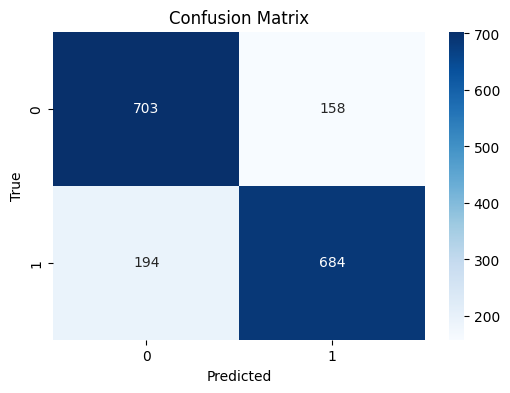

In [391]:
plot_confusion_matrix(rf, X_test, y_test)

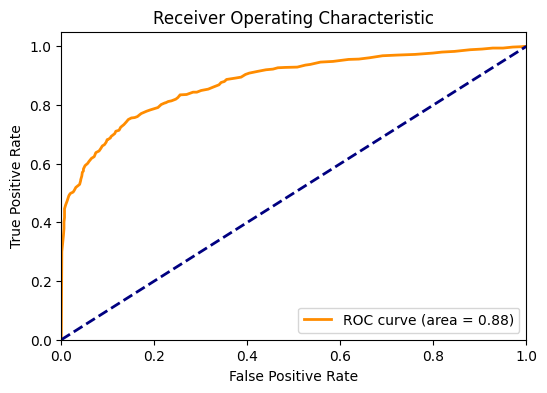

In [392]:
plot_roc_curve(rf, X_test, y_test)

In [395]:
print (classification_reports['Random Forest'])

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       861
           1       0.81      0.78      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [372]:
## Submit Predictions
!kaggle competitions submit -c spaceship-titanic -f preds1.csv -m 'Without Feature Engineering Random Forest'


#### Trainning on Data with Feature engineering

In [397]:
df = feat_df.drop(columns=unwanted_columns)
X_train, X_test, y_train, y_test,scaler_with_fe = get_data_for_trainning(df)
trained_models_with_fe,metrics_df,classification_reports = train_models(X_train, X_test, y_train, y_test)
metrics_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
6,XGBoost,0.801035
2,Support Vector Machine,0.793560
5,Random Forest,0.787234
0,Logistic Regression,0.786084
3,K-Nearest Neighbors,0.769408
1,Naive Bayes,0.753882
4,Decision Tree,0.732605


In [398]:
xgboost = trained_models_with_fe['XGBoost']#selected the best model
df = feat_df_test.drop(columns=unwanted_columns)
df = generate_predictions(xgboost,df,scaler_with_fe,label_encoder)
df[['PassengerId','Transported']].to_csv('preds2.csv',index=False)

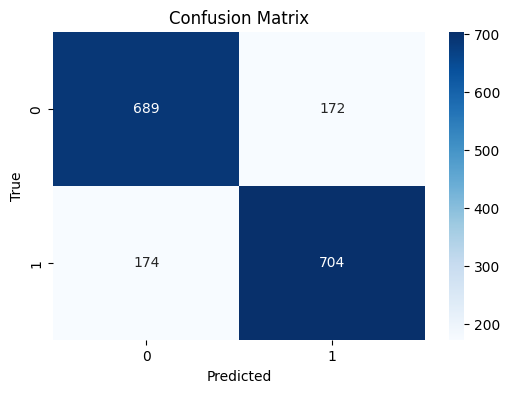

In [399]:
plot_confusion_matrix(xgboost, X_test, y_test)

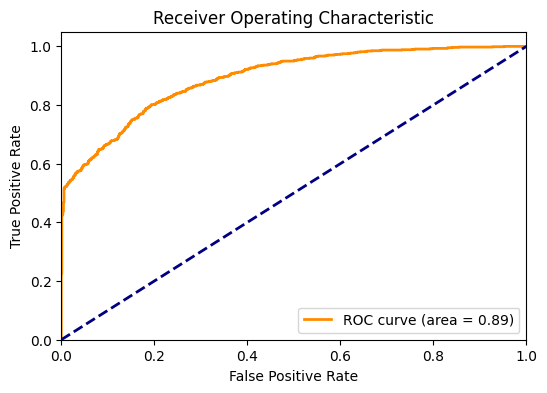

In [401]:
plot_roc_curve(xgboost, X_test, y_test)

In [402]:
print (classification_reports['XGBoost'])

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       861
           1       0.80      0.80      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [319]:
## Submit Predictions
!kaggle competitions submit -c spaceship-titanic -f preds2.csv -m 'with FE and using XGboost'

100% 56.4k/56.4k [00:00<00:00, 99.9kB/s]
Successfully submitted to Spaceship Titanic

### Hyperparamer tuning

In [403]:
from sklearn.model_selection import GridSearchCV
#function for hyper parametr tuning
def hyper_parameter_tuning(xgboost_model,X_train, X_test, y_train, y_test):
  param_grid = {
      'n_estimators': [50, 100, 200],
      'learning_rate': [0.01, 0.1, 0.2],
      'max_depth': [3, 4, 5],
  }
  grid_search = GridSearchCV(xgboost_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1,verbose=10)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  print (f"Best Params Found: {best_params}")
  best_estimator = grid_search.best_estimator_
  y_pred = best_estimator.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return best_estimator

In [404]:
df = feat_df.drop(columns=unwanted_columns)
X_train, X_test, y_train, y_test,scaler_with_fe = get_data_for_trainning(df,test_size=0.2)
best_xgboost = hyper_parameter_tuning(xgboost,X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Params Found: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [409]:
df = feat_df_test.drop(columns=unwanted_columns)
df = generate_predictions(best_xgboost,df,scaler_with_fe,label_encoder)
df[['PassengerId','Transported']].to_csv('preds3.csv',index=False)

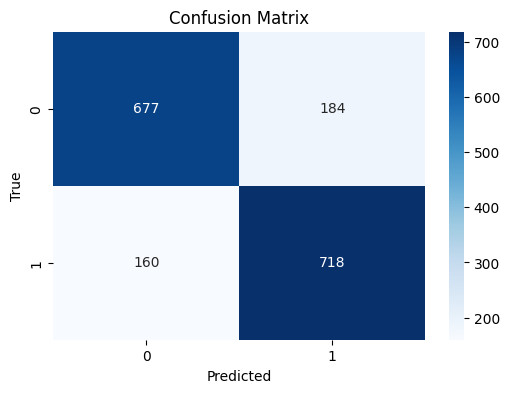

In [405]:
plot_confusion_matrix(best_xgboost, X_test, y_test)

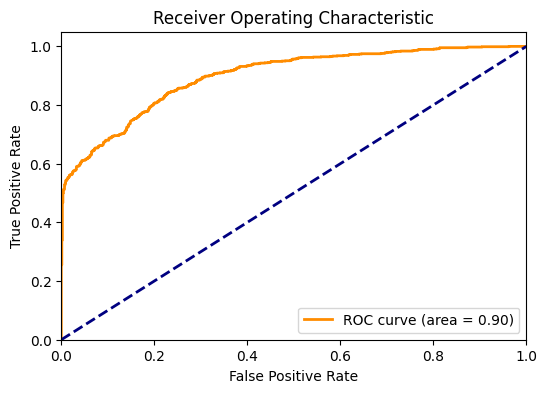

In [406]:
plot_roc_curve(best_xgboost, X_test, y_test)

In [407]:
y_pred = best_xgboost.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       861
           1       0.80      0.82      0.81       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [410]:
!kaggle competitions submit -c spaceship-titanic -f preds3.csv -m 'XGBOOST with FE and hyperopt'

100% 56.3k/56.3k [00:00<00:00, 96.5kB/s]
Successfully submitted to Spaceship Titanic

### Model Interpretability

In [411]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 12.6 MB/s eta 0:00:00


In [414]:
import matplotlib.pyplot as plt
import shap

def plot_feature_importance(model, feature_names):
    """
    Plots feature importance for tree-based models.
    """

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Only select the top 10 features
    top_indices = indices[:10]
    top_importances = importances[top_indices]
    top_names = [feature_names[i] for i in top_indices]
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(top_names)), top_importances, align='center')
    plt.yticks(range(len(top_names)), top_names)
    plt.xlabel('Feature Importance')
    plt.title("Top 10 Feature Importance")
    plt.gca().invert_yaxis()
    plt.show()

def plot_shap_values(model, X_train):
    """
    Plots SHAP values for model interpretability.
    """
    # Explain model's predictions using SHAP
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)

    # Plot SHAP values
    shap.plots.beeswarm(shap_values)



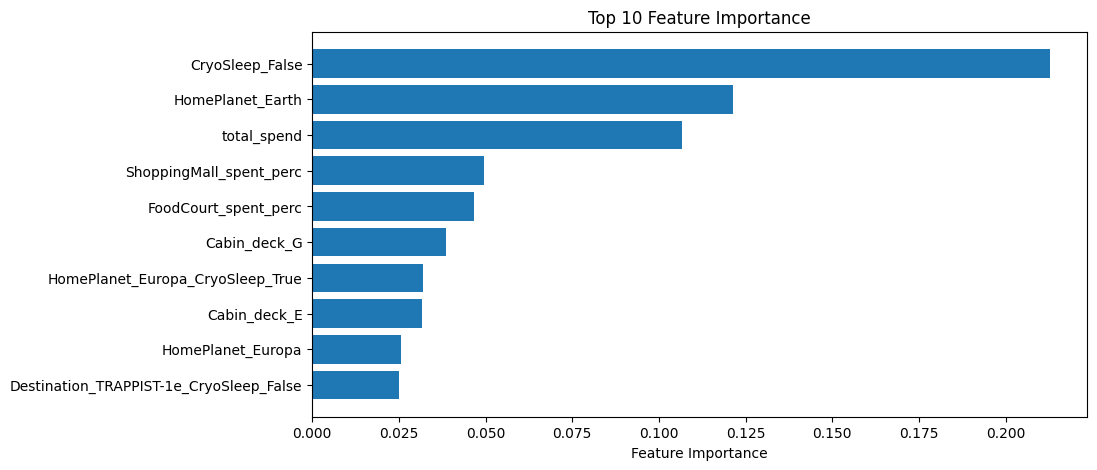

In [415]:
plot_feature_importance(model=best_xgboost, feature_names=X_train.columns)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


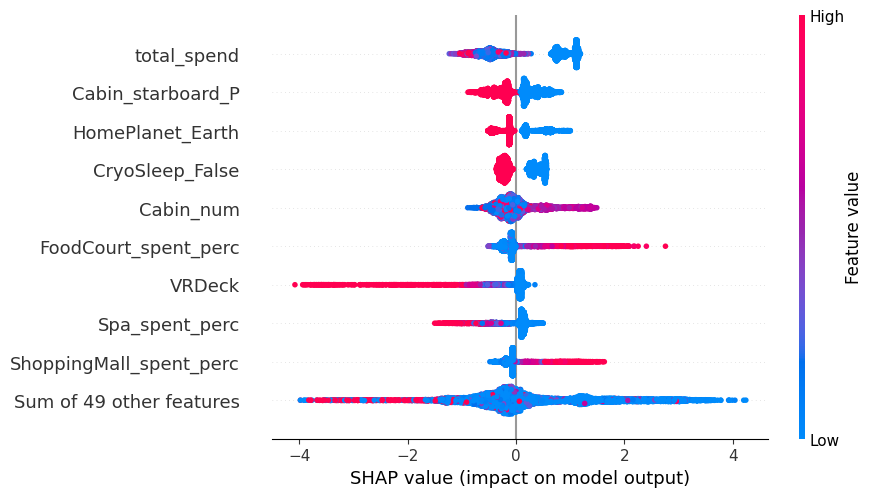

In [416]:
plot_shap_values(model=best_xgboost, X_train=X_train)